### Случайный лес

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

In [104]:
data=pd.read_csv('data_trees.csv')
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)

In [105]:
data.head(10)

,Answer,inn_act,novelty,inn_prod,size,climate,age,competition,technologe_acq,RD,...,main_ag,Int_property,boss_experience,papers,wifi,MBA,passport,mortgage,green,Type
0,1,0.0,0.00,0.00,4.0,7.0,35.0,3,1,0.46,...,1.0,0,0,0,0,0,18.8,7.1,1,2
1,1,0.0,0.00,0.00,6.0,8.0,64.0,1,0,0.14,...,1.0,1,0,79,0,0,19.6,15.7,2,2
2,1,1.0,0.24,0.78,3.0,8.0,26.0,2,0,0.03,...,1.0,0,1,110,0,0,26.4,9.6,1,1
3,0,0.0,0.00,0.00,5.0,2.0,55.0,3,0,0.16,...,1.0,0,0,0,0,0,52.6,18.1,1,4
4,1,1.0,0.18,0.91,5.0,5.0,43.0,3,1,0.60,...,3.0,1,1,0,0,0,8.3,13.4,3,1
5,1,1.0,0.16,0.74,7.0,10.0,64.0,3,0,0.60,...,1.0,1,1,42,0,0,13.8,3.6,2,1
6,0,0.0,0.00,0.00,6.0,3.0,36.0,1,0,0.00,...,1.0,1,0,0,0,0,67.2,0.9,2,4
7,1,1.0,0.07,0.85,7.0,6.0,47.0,3,0,0.42,...,3.0,1,1,117,0,0,29.7,5.9,4,1
8,0,1.0,0.08,0.20,7.0,1.0,61.0,1,0,0.53,...,1.0,0,1,26,0,1,60.7,7.1,1,3
9,1,0.0,0.00,0.00,2.0,8.0,71.0,3,0,0.52,...,1.0,1,0,0,1,0,24.8,13.6,2,2


In [106]:
data.columns

Index(['Answer', 'inn_act', 'novelty', 'inn_prod', 'size', 'climate', 'age',
       'competition', 'technologe_acq', 'RD', 'market', 'novelty_tech',
       'marketing_inn', 'organizational_inn', 'main_ag', 'Int_property',
       'boss_experience', 'papers', 'wifi', 'MBA', 'passport', 'mortgage',
       'green', 'Type'],
      dtype='object')

__Описание переменных__. 
__Answer__ - компания инновационно-активная в 2018 году (0 -нет, 1 -да)

__age__ - возраст руководителя в 2017 году    
__boss_experience__ – наличие успешного опыта у руководителя предприятия по 
реализации инновационных проектов по оценке сотрудников (0-нет, 1 -да)  
__climate__ - оценка предприятием условий для создания и распространения инноваций на рынке (10- максимально благоприятные, 0 - крайне неблагоприятные)    
__competition__- оценка компанией степени конкуренции на рынке (1- минимум, 5- максимум)  
__green__ – озелененность территории (до 5 баллов, 5 баллов -максимум)  
__inn_act__ - компания инновационно-активная в 2017 году (0-нет, 1-да)
__inn_prod__ - доля продаж инновационной продукции в общем объеме продаж компании
__Int_property__ – оценка предприятием степени надежности защиты интеллектуальной 
собственности (0-недостаточная защита, 1- надежная защита)   
__main_ag__ - расположение головной организации (1- Россия, 2- в странах СНГ, 3- в странах ЕС, 4- США, Канада, 5- другое)
__market__ – наиболее важный рынок сбыта для компании 1- местный, региональный, 2-общероссийский, 3-стран СНГ, 4 – европейский, 5 –другие
__marketing_inn__ - осуществляла ли компания маркетинговые инновации в 2017 году (0 -нет, 1-да)
__MBA__ – наличие степени MBA у руководителя предприятия  
__mortgage__ – доля сотрудников предприятия, у которых есть ипотечные кредиты  
__novelty__ - доля продаж новой для рынка инновационной продукции в общем объеме продаж инновационной продукции компании в 2017 году (для не инновационно-активных в 2017 году – 0)
__novelty_tech__- доля продаж инновационной продукции вновь внедренной или подвергавшимся значительным изменениям в течение последних трех лет в общем объеме продаж инновационной продукции
__organizational_inn__- осуществляла ли компания организационные инновации в 2017 году (0-нет, 1 -да)  
__papers__ -  количество статей сотрудников предприятий в различных изданиях за 3   года
__passport__ – доля сотрудников предприятия, у которых оформлен заграничный         паспорт  
__RD__ - доля затрат на исследования и разработку новых продуктов, услуг и методов производства в затратах на технологические инновации в 2017 году
__size__ - - размерность предприятия (от 1 до 9, в порядке возрастания количества занятых)  
Малые: 1) 37   до 49 человек; 2) 50 - 99 человек
Средние 3) 100-199 человек; 4)  200-249 человек
Крупные 5) 250 - 499 человек; 6) 500 - 999 человек; 7) 1000-4999 человек; 8) 5000 - 9999 человек; 9) от 10000 человек
__technology_acq__ - приобретала ли компания технологии в неовеществлённой форме за последние 5 лет (с 2013 по 2017) (0 – нет, 1 -да)
__wifi__ – наличие открытой сети wifi в головном офисе предприятия  


In [107]:
data.describe()

,Answer,inn_act,novelty,inn_prod,size,climate,age,competition,technologe_acq,RD,...,main_ag,Int_property,boss_experience,papers,wifi,MBA,passport,mortgage,green,Type
count,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,...,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000
mean,0.444041,0.481831,0.096628,0.237834,4.694767,5.073401,49.212936,2.907703,0.248547,0.265182,...,1.180233,0.438227,0.481831,34.103198,0.236192,0.061773,37.581468,9.246076,1.521802,2.630087
std,0.497039,0.499851,0.154323,0.304236,2.526917,3.138220,14.090683,1.240902,0.432327,0.206641,...,0.647963,0.496350,0.499851,42.736447,0.424896,0.240831,19.042908,5.432982,0.663515,1.267414
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,38.000000,2.000000,0.000000,0.070000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.900000,4.400000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,51.000000,3.000000,0.000000,0.250000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,36.500000,9.100000,1.000000,3.000000
75%,1.000000,1.000000,0.130000,0.480000,7.000000,8.000000,61.000000,4.000000,0.000000,0.430000,...,1.000000,1.000000,1.000000,69.000000,0.000000,0.000000,50.750000,13.925000,2.000000,4.000000
max,1.000000,1.000000,0.790000,0.930000,9.000000,10.000000,72.000000,5.000000,1.000000,0.670000,...,5.000000,1.000000,1.000000,133.000000,1.000000,1.000000,87.200000,18.900000,5.000000,4.000000


### Сбалансирована ли выборка?

In [108]:
non_innovative=0

for i in range (0, len(data.Answer)):
    if data.Answer[i]==0 and data.inn_act[i]==0:
        non_innovative+=1
        i+=1
past_innovative=0       
for i in range (0, len(data.Answer)):
    if data.Answer[i]==0 and data.inn_act[i]==1:
        past_innovative+=1
        i+=1       
new_innovative=0
for i in range (0, len(data.Answer)):
    if data.Answer[i]==1 and data.inn_act[i]==0:
        new_innovative+=1
        i+=1  
innovative=0
for i in range (0, len(data.Answer)):
    if data.Answer[i]==1 and data.inn_act[i]==1:
        innovative+=1
        i+=1      
print ({"неинновационные предприятия": non_innovative})
print  ({"завершившие инновационную деятельность предприятия":past_innovative})
print ({'начавшие инновационную деятельность предприятия': new_innovative})
print ({"инновационные предприятия": innovative})


{'неинновационные предприятия': 523}
{'завершившие инновационную деятельность предприятия': 242}
{'начавшие инновационную деятельность предприятия': 190}
{'инновационные предприятия': 421}


In [109]:
# Ваш код без циклов
non_innovative = sum((data.Answer == 0) & (data.inn_act == 0))
past_innovative = sum((data.Answer == 0) & (data.inn_act == 1))
new_innovative = sum((data.Answer == 1) & (data.inn_act == 0))
innovative = sum((data.Answer == 1) & (data.inn_act == 1))

print({"неинновационные предприятия": non_innovative})
print({"завершившие инновационную деятельность предприятия": past_innovative})
print({'начавшие инновационную деятельность предприятия': new_innovative})
print({"инновационные предприятия": innovative})

{'неинновационные предприятия': 523}
{'завершившие инновационную деятельность предприятия': 242}
{'начавшие инновационную деятельность предприятия': 190}
{'инновационные предприятия': 421}


## Отличия характеристик предприятий в зависимости от статуса инновационной активности

In [110]:
Type=np.random.randint(5,7, len(data.Answer))
for i in range(0, len(data.Answer)):
    if data.Answer[i]==0 and data.inn_act[i]==0:
        Type[i]=4
    if data.Answer[i]==0 and data.inn_act[i]==1:
        Type[i]=3
    if data.Answer[i]==1 and data.inn_act[i]==0:
        Type[i]=2
    if data.Answer[i]==1 and data.inn_act[i]==1:
        Type[i]=1
data['Type']=Type

In [111]:
# Ваш код без циклов
Type[(data.Answer == 0) & (data.inn_act == 0)] = 4
Type[(data.Answer == 0) & (data.inn_act == 1)] = 3
Type[(data.Answer == 1) & (data.inn_act == 0)] = 2
Type[(data.Answer == 1) & (data.inn_act == 1)] = 1

data['Type'] = Type
data['Type']

0       2
1       2
2       1
3       4
4       1
       ..
1371    4
1372    3
1373    3
1374    4
1375    2
Name: Type, Length: 1376, dtype: int32

### Доля продаж инновационной продукции среди всех продаж предприятия

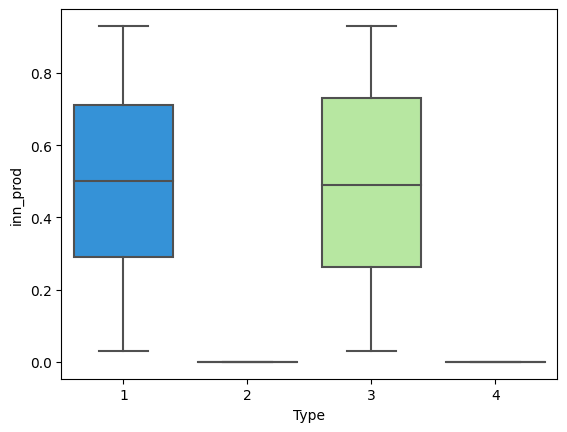

In [112]:
sns.boxplot(x="Type", y="inn_prod", data=data, palette='rainbow');

In [113]:
# Интерпретация

4 - компания неинновационная

3 - компания перестала быть инновационной

2 - компания сначала не была инновационной, но стала таковой

1 - компания всегда была инновационной

### Рыночная новизна продукции

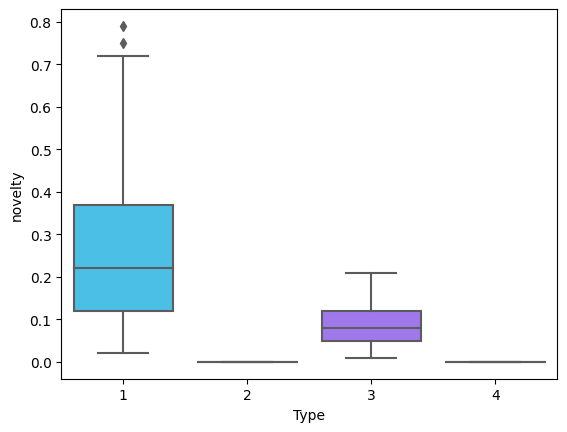

In [114]:
sns.boxplot(x="Type", y="novelty", data=data, palette='cool');

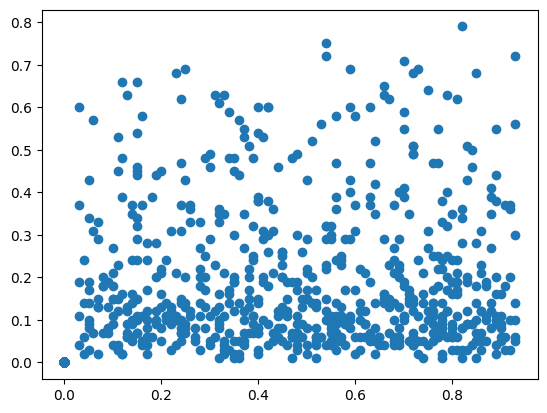

In [115]:
plt.scatter(data.inn_prod, data.novelty)

In [116]:
# Объяснить, почему нет зависимости

Компании, которые в 2017 году считались инновационными, обладают значительной долей продаж инновационной продукции (тип 1 и 3), и ее распределение между этими двумя типами плюс-минус схоже. В то время как компании, не признанные инновационными в 2017 году, не обладают инновационной продукцией, следовательно, доля таких продуктов в их продажах составляет ноль.

###  Технологичнская новизна продукции

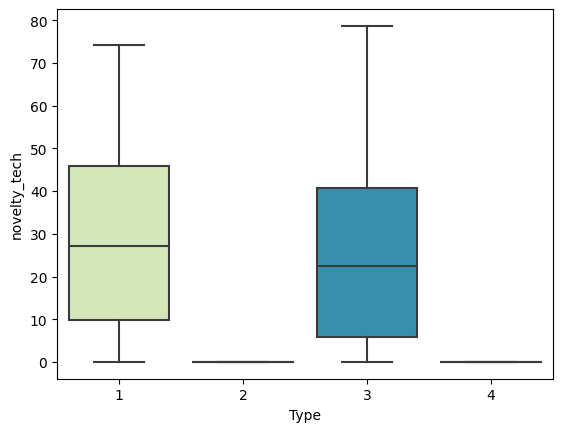

In [117]:
sns.boxplot(x="Type", y="novelty_tech", data=data, palette='YlGnBu');

### Затраты на исследования и разработку новой продукции

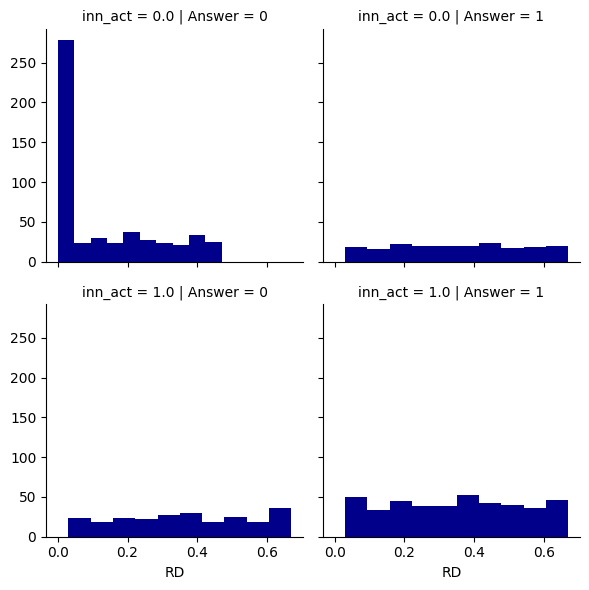

In [118]:
g = sns.FacetGrid(data, col="Answer", row="inn_act")
g = g.map(plt.hist, "RD", color='darkblue');

In [119]:
# Интерпретация

Рассмотрим график, где:

Когда inn_act равно 0 и answer равно 0, это относится к компаниям, которые не были инновационными в 2017 году и тратили небольшие средства (приблизительно 0.1) на разработку новых продуктов. Это подтверждается столбцом частот, который соответствует значению 250. Из них лишь небольшая часть компаний (не более 50) инвестировала значительные средства (0.5) в разработку продуктов. В сравнении с другими графиками, эти компании выделялись наименьшими затратами на разработку.

Когда inn_act равно 0 и answer равно 1, компании, которые могут стать инновационными, равномерно распределены по разным категориям затрат на разработку новых продуктов, начиная от 0.1 и до 0.7. Нет компаний, которые не выделяли бы бюджет на разработку, так как минимальное значение начинается с 0.05.

Когда inn_act равно 1 и answer равно 0, бюджет на разработку у компаний, которые были инновационными, распределен схожим образом, как у тех, которые могут стать инновационными в следующем году. Однако заметно больше компаний, которые выделяли огромные средства, приблизительно 0.6, и, следовательно, они были настроены на выпуск новых продуктов на рынок.

Когда inn_act равно 1 и answer равно 1, расходы компаний также равномерно распределены по разным категориям от 0.05 до 0.65. Однако выделяются компании, которые тратят либо очень мало средств на разработку, либо усредненную сумму (приблизительно 0.35), либо 0.65.

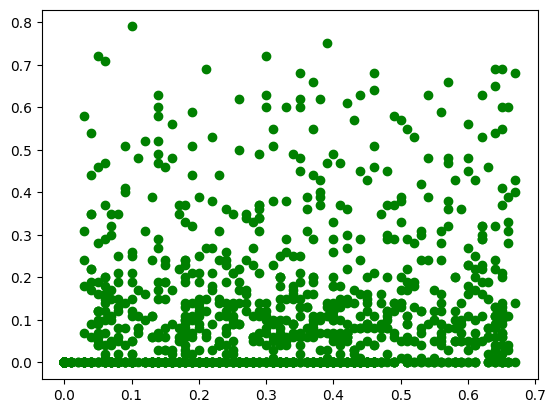

In [120]:
plt.scatter(data.RD, data.novelty, color='green')

In [121]:
# Интерпретация и объяснения отсутсвитя зависимости


Переменная 'novelty' также охватывает продукцию, которая может быть рассмотрена как новаторская, но с течением трех лет она перестает считаться результатом исследований и разработок (R&D). Таким образом, на графике не отражена определенная зависимость.

### Оценка делового климата

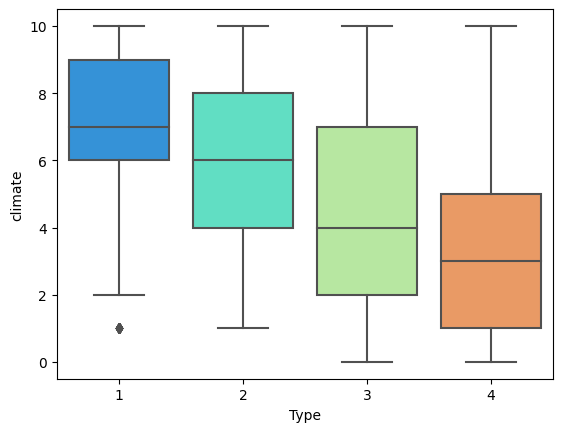

In [122]:
sns.boxplot(x="Type", y="climate", data=data, palette='rainbow');

In [123]:
# Интерпретация

В компаниях первого типа (которые были инновационными и продолжают таковыми), в среднем, наблюдаются наивысшие оценки делового климата. Компании второго типа (которые стали инновационными) также имеют довольно высокий уровень делового климата. В отличие от этого, в компаниях, которые в 2018 году не связаны с инновациями, уровень делового климата значительно ниже по сравнению с теми, которые считаются инновационными. Таким образом, можно сделать вывод, что инновации положительно влияют на деловой климат в компании.

### Оценка уровня конкуренции

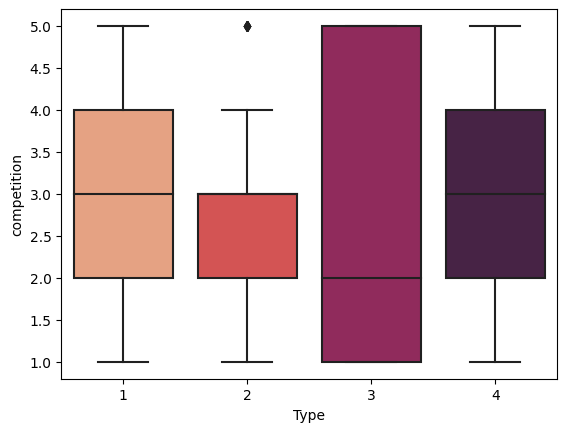

In [124]:
sns.boxplot(x="Type", y="competition", data=data, palette='rocket_r');

In [125]:
# Интерпретация


Показатели оценки степени конкуренции в компаниях третьего типа проявляют самое разнообразное разнообразие. Исходя из этого можно сделать вывод, что уровень конкуренции на рынке не оказывает влияния на утрату статуса инновационности компании. Вместе с тем, компании второго типа выказывают наиболее однородные значения по данному параметру. Также можно отметить, что компании, только стремящиеся к статусу инновационной, оценивают ситуацию на рынке практически одинаково.

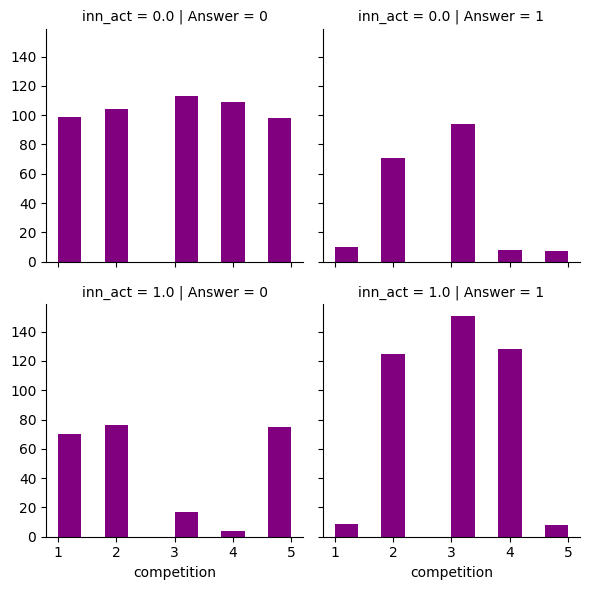

In [126]:
g = sns.FacetGrid(data, col="Answer", row="inn_act")
g = g.map(plt.hist, "competition", color='Purple');

In [127]:
# Интерпретация

Рассмотрим оценки уровня конкуренции различными компаниями:

При inn_act равном 0 и answer равном 0, компании, которые не были инновационными, распределяют свои оценки равномерно от 1 до 5. Возможно, эта оценка зависит от размера компании, где крупные предприятия ставят меньшие оценки, в то время как малые компании предпочитают более высокие оценки.

При inn_act равном 0 и answer равном 1, компании, которые стремятся к статусу инновационных, оценивают уровень конкуренции на рынке от 2 до 3. Для них это может указывать на свободный и открытый рынок для внедрения новых инновационных продуктов.

При inn_act равном 1 и answer равном 0, компании, которые уже были инновационными, но, вероятно, не будут таковыми в 2018 году, разнообразно оценивают конкуренцию на рынке. Для большинства компаний конкуренция оценивается как низкая (от 1 до 2), в то время как для других она оценивается как высокая. Возможно, эти компании недавно появились на рынке.

При inn_act равном 1 и answer равном 1, компании, которые были инновационными и, вероятно, станут таковыми в 2018 году, выставляют средние оценки уровня конкуренции на рынке от 2 до 4. Это может указывать на наличие конкурентов, но при этом рынок не является монополизированным.

# Обучение модели случайного леса (без отбора показателей)

In [128]:
from sklearn import ensemble, model_selection, metrics 
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\Xiaomi\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['display', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [129]:
Answer = data.Answer
others_data = data.iloc[:, 1:]
others_data=others_data.drop(columns=['Type'])

In [130]:
classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

In [131]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(classifier_low_depth, others_data, Answer, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(others_data, Answer, test_size=0.33, random_state=42)

classifier_low_depth.fit(X_train, y_train)
tree_low = classifier_low_depth.estimators_[5]

from sklearn.tree import export_graphviz
import pydot

export_graphviz(tree_low, out_file = 'tree_low.dot', feature_names = others_data.columns, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree_low.dot')

graph.write_png('tree_low.png')

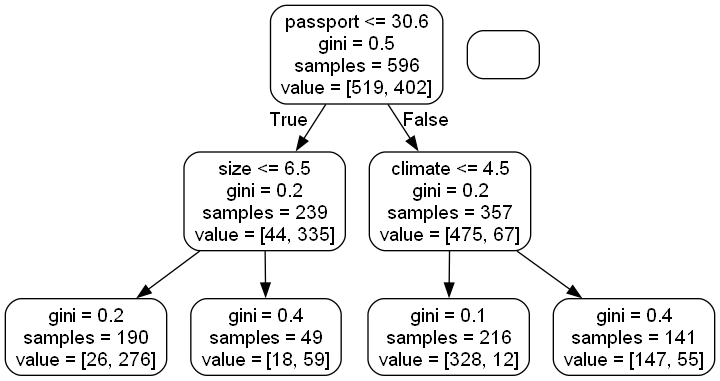

In [133]:
from IPython import display
display.Image("tree_low.png")

In [134]:
print (train_sizes)
print (train_scores.mean(axis = 1))
print (test_scores.mean(axis = 1))

[ 91 275 458 641 825]
[0.94871795 0.9430303  0.93668122 0.93083723 0.93373737]
[0.88809608 0.9077055  0.92152106 0.92442751 0.92079484]


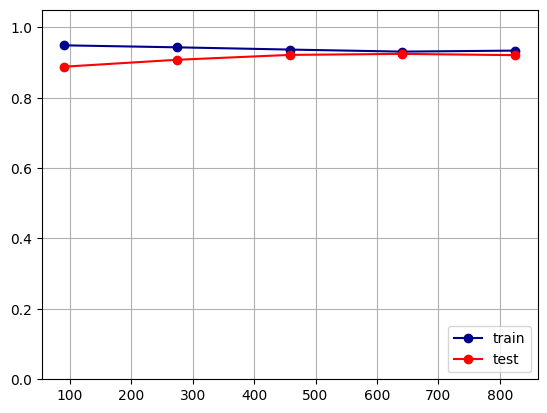

In [135]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'darkblue', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [136]:
classifier_low_depth.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=1)

In [137]:
classifier_low_depth.score(X_test, y_test)

0.9208791208791208

In [138]:
# Подробное описание кода

Подготовка данных:
Целевая переменная для классификации (Answer) извлекается из набора данных. Набор данных others_data создается путем удаления столбца Type.

Обучение модели:
Для обучения модели применяется классификатор случайного леса (RandomForestClassifier) с 50 деревьями (n_estimators = 50) и ограниченной глубиной (max_depth = 2). Эффективность модели оценивается с использованием learning_curve, который анализирует изменение размера тренировочного набора данных.

Разделение данных на тренировочные и тестовые:
С использованием метода train_test_split данные разбиваются на тренировочный и тестовый наборы в соотношении 67% к 33%, соответственно.

Обучение и визуализация одного дерева:
Классификатор обучается на тренировочном наборе данных, после чего визуализируется одно из деревьев в лесу (tree_low) для проведения анализа.

В консоль выводятся размеры обучающих наборов данных и средние оценки точности на обучающем и тестовом наборах. Также строится график, отображающий точность на обучающих и тестовых наборах в зависимости от размера обучающего набора. Метод RandomForestClassifier создает несколько деревьев решений и использует усреднение для повышения точности. Метод train_test_split разделяет данные на части для обучения и тестирования модели. Для генерации визуализации одного дерева решений используются export_graphviz и pydot. Метод learning_curve предоставляет оценку того, как размер обучающего набора влияет на точность модели.

In [139]:
classifier_high_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 10)

In [140]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(classifier_high_depth, others_data, Answer, 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=3, scoring='accuracy')

In [141]:

classifier_high_depth.fit (X_train, y_train)
tree_high = classifier_high_depth.estimators_[5]

from sklearn.tree import export_graphviz
import pydot

export_graphviz(tree_high, out_file = 'tree_high.dot', feature_names = others_data.columns, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree_high.dot')
# Записываем граф в png file
graph.write_png('tree_high.png')

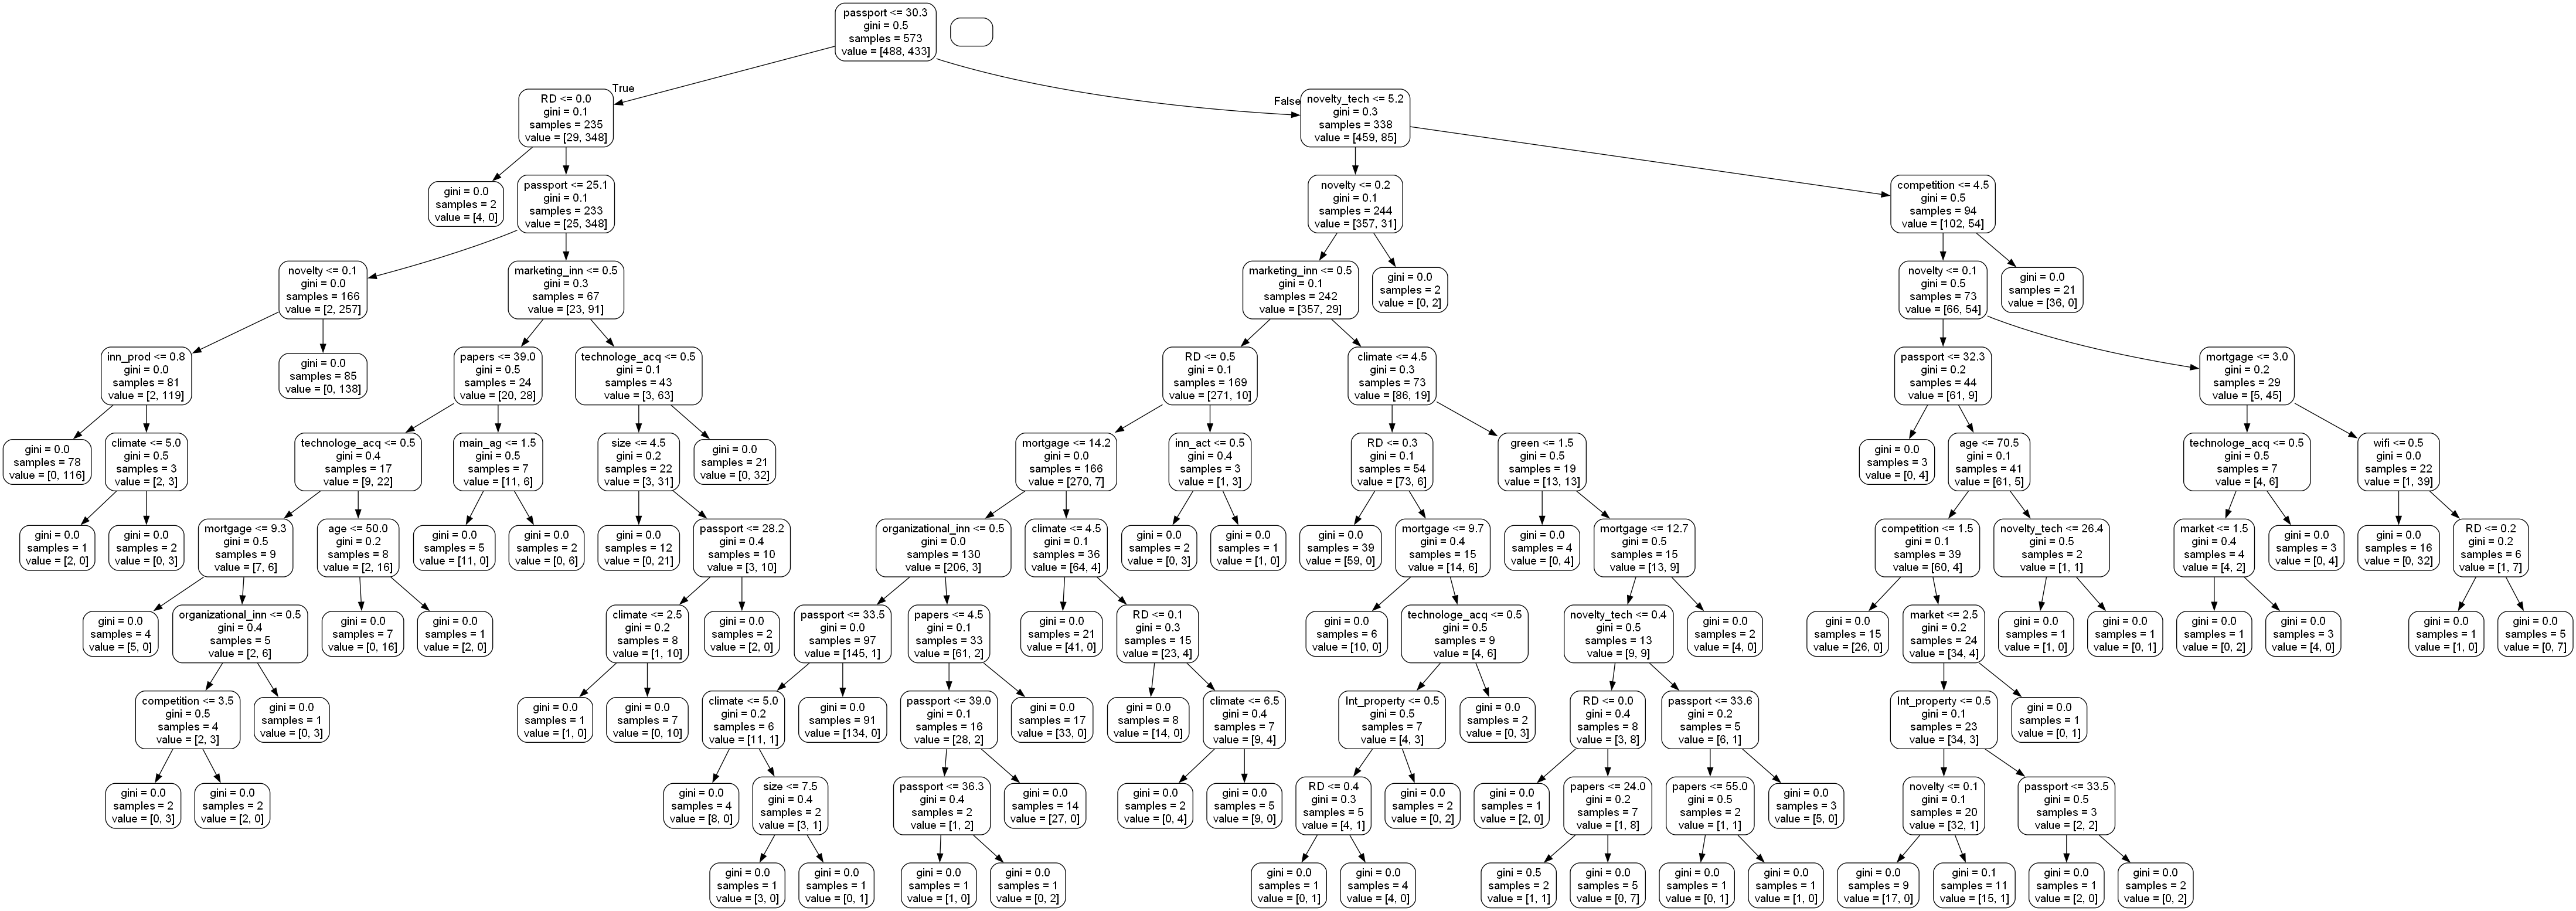

In [142]:
from IPython import display
display.Image("tree_high.png")

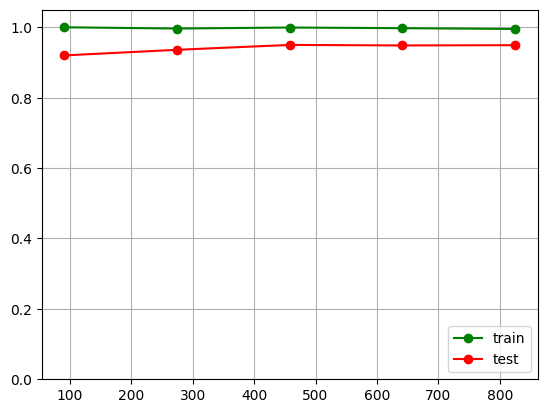

In [143]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'green', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'red', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [144]:
X_train, X_test, y_train, y_test = train_test_split(others_data, Answer, test_size=0.33, random_state=10)

In [145]:
classifier_high_depth.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=10)

In [146]:
classifier_high_depth.score(X_test, y_test)

0.9494505494505494

In [147]:
# Объяснение и интерпретация различий

## Значимость параметров модели

In [148]:
imp = pd.DataFrame({'feature': list(others_data.columns),
                   'importance': classifier_high_depth.feature_importances_}).\
                    sort_values('importance', ascending = False)

imp.head(23)

,feature,importance
19,passport,0.321835
1,novelty,0.125905
7,technologe_acq,0.107175
4,climate,0.096985
8,RD,0.075844
6,competition,0.031795
10,novelty_tech,0.029192
2,inn_prod,0.027171
11,marketing_inn,0.026672
9,market,0.023344


In [149]:
# Интерпретация

Самым важным критерием является наличие заграничного паспорта у сотрудника, поскольку это, вероятно, обозначает возможность проведения командировок в другие страны для вдохновения и поддержки новых инновационных идей. Затем по важности следует показатель novelty, отражающий долю проданных инновационных продуктов от общих продаж. Это указывает на то, что компания, которая уже успешно реализовывала инновации, скорее всего, будет и в будущем году активной в инновационной сфере. После этого по важности идут technologe_acq (приобретение технологий в неоформленной форме за последние 5 лет), climate (оценка условий для создания и распространения инноваций на рынке), RD (доля затрат на исследования и разработку новых продуктов, услуг и методов производства в затратах на технологические инновации в 2017 году) и competition (оценка степени конкуренции на рынке компанией). Вывод заключается в том, что организации, активно приобретающие технологии и готовые вкладываться в них, а также считающие условия для развития инноваций благоприятными, с более высокой вероятностью будут инновационно активными в следующем году. Другие признаки имеют невысокую важность (< 0.03), поэтому их детальное рассмотрение не требуется. Стоит отметить, что степень MBA у руководителя предприятия имеет наименьшую значимость, почти не влияя на инновационность компании.

## Отбор параметров

### Удаление признаков на основании здравого смысла

In [150]:
selected_features_temp=others_data.drop(columns=['age', 'green', 'MBA', 'mortgage', 'wifi', 'size'])

### Удаление признаков на основании коэффициентов корреляции

<Axes: >

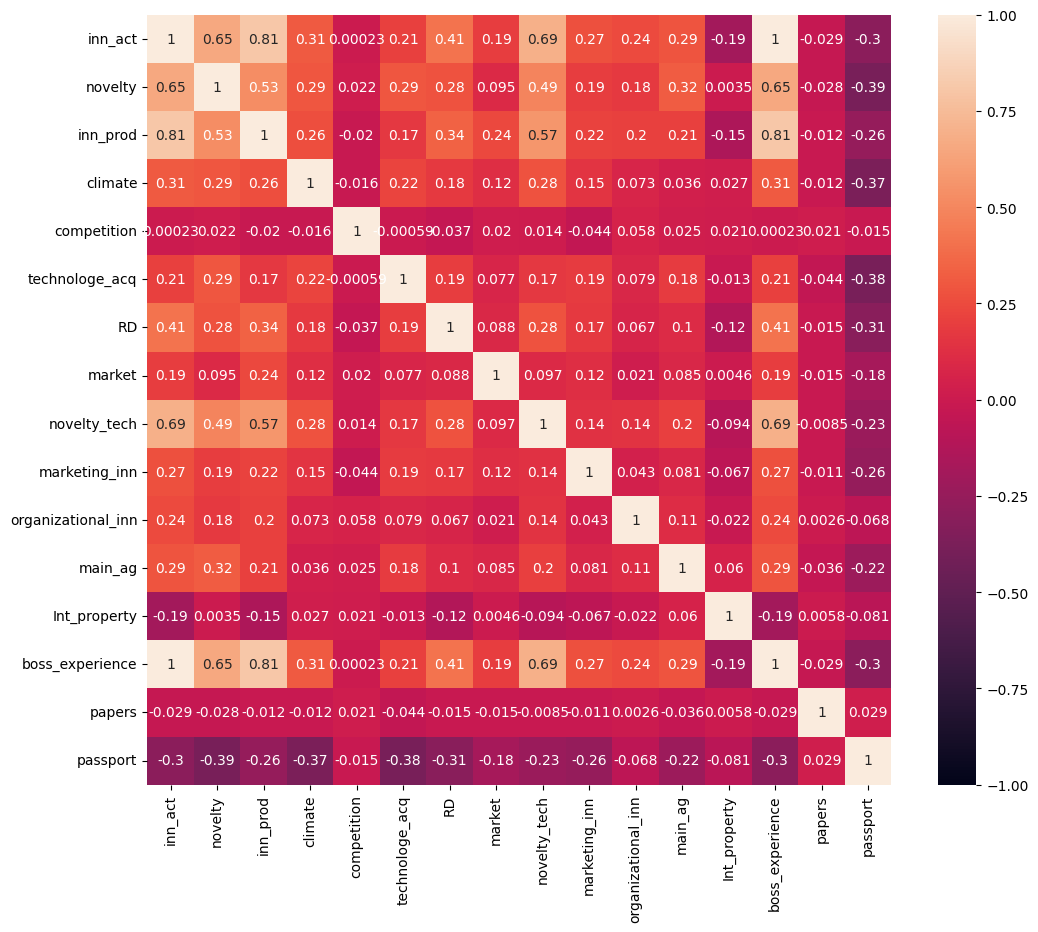

In [151]:
# Ваш код
selected_features_temp.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(selected_features_temp.corr(), annot = True, vmin=-1, vmax=1)

In [152]:
selected_features_temp=selected_features_temp.drop(columns=['boss_experience'])

<Axes: >

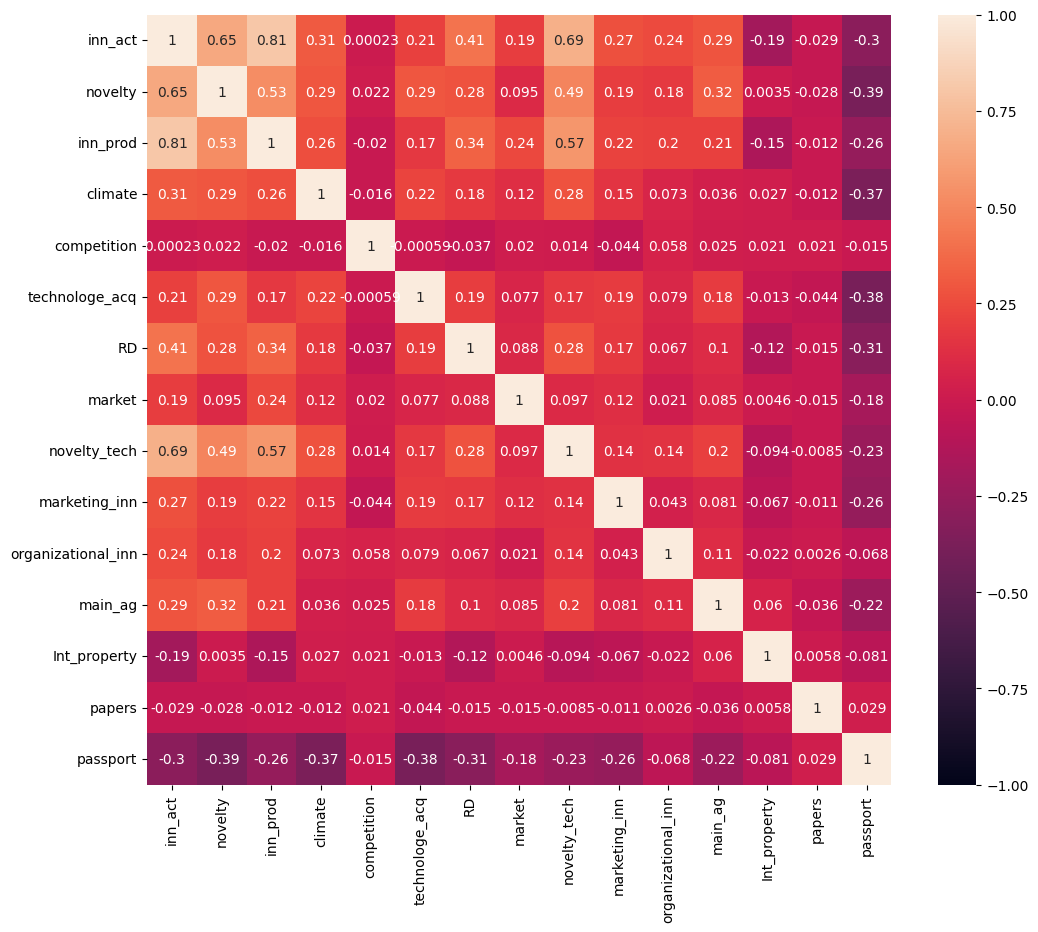

In [153]:
selected_features_temp.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(selected_features_temp.corr(), annot = True, vmin=-1, vmax=1)

In [154]:
classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

In [155]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(classifier_low_depth, selected_features_temp, Answer,
                                                                       train_sizes=np.arange(0.1,1., 0.2),
                                                                       cv=3, scoring='accuracy')

In [156]:
X_train, X_test, y_train, y_test = train_test_split(selected_features_temp, Answer, test_size=0.33, random_state=42)

classifier_low_depth.fit(X_train, y_train)
tree_low = classifier_low_depth.estimators_[5]

from sklearn.tree import export_graphviz
import pydot

export_graphviz(tree_low, out_file = 'tree_low.dot', feature_names = selected_features_temp.columns, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree_low.dot')

graph.write_png('tree_low.png')

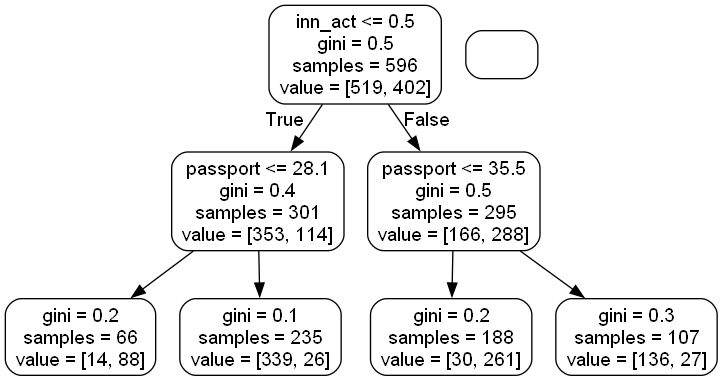

In [157]:
from IPython import display
display.Image("tree_low.png")

In [158]:
print (train_sizes)
print (train_scores.mean(axis = 1))
print (test_scores.mean(axis = 1))

[ 91 275 458 641 825]
[0.94505495 0.93454545 0.93813683 0.93291732 0.93737374]
[0.88883973 0.91860668 0.92442434 0.924418   0.92805701]


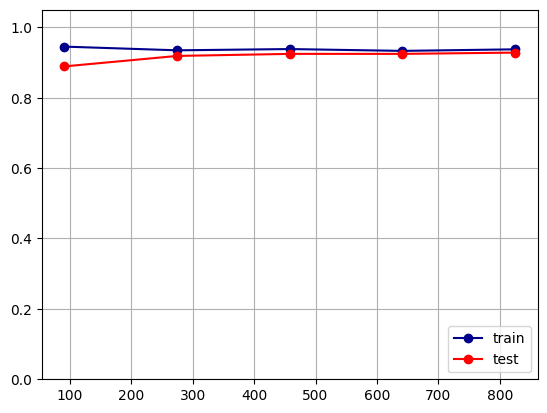

In [159]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'darkblue', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [160]:
classifier_low_depth.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=1)

In [161]:
classifier_low_depth.score(X_test, y_test)

0.9384615384615385

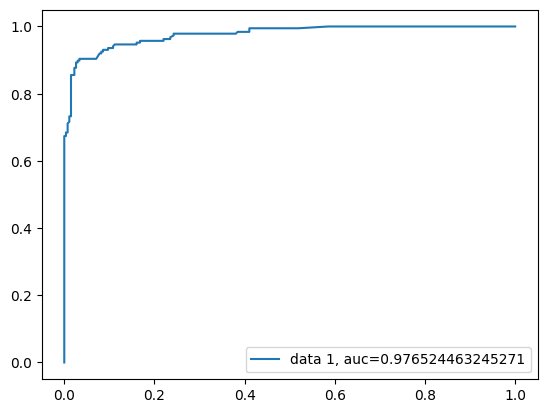

0.976524463245271


In [163]:
probs = classifier_low_depth.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(auc)